In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\U\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


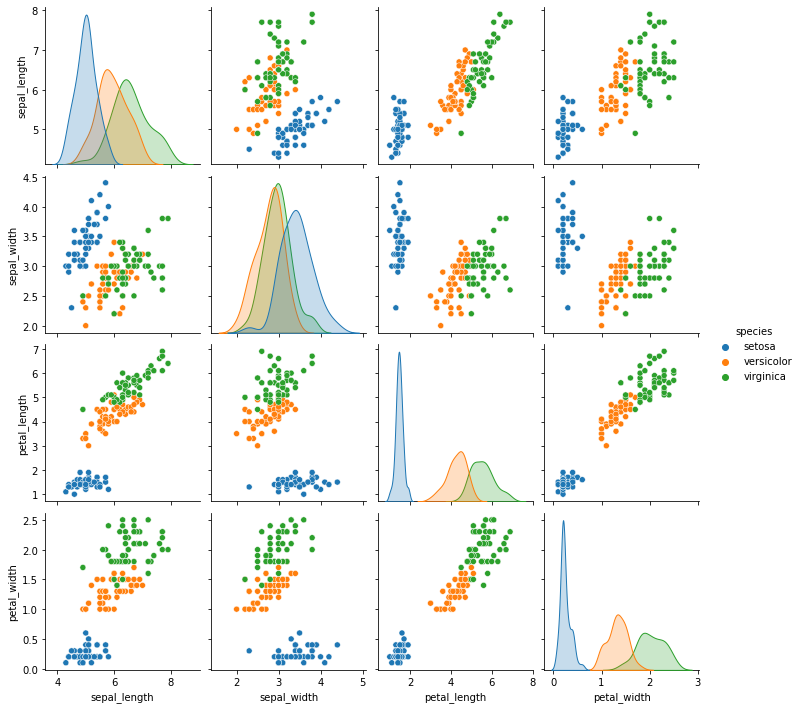

In [3]:
sns.pairplot(iris, hue = 'species', size = 2.5);

In [4]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


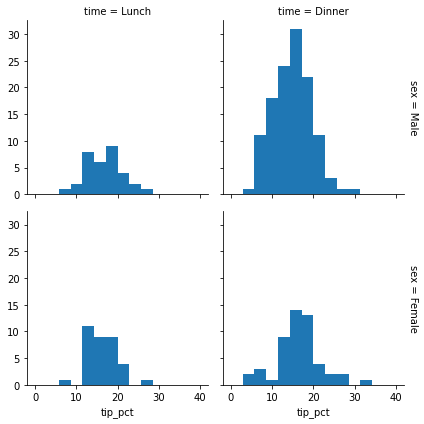

In [5]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row = 'sex', col = 'time', margin_titles = True)
grid.map(plt.hist, 'tip_pct', bins = np.linspace(0, 40, 15));

C:\Users\U\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


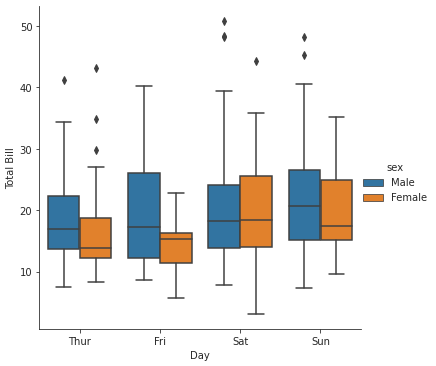

In [6]:
with sns.axes_style('ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data = tips, kind = 'box')
    g.set_axis_labels('Day', 'Total Bill')

C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


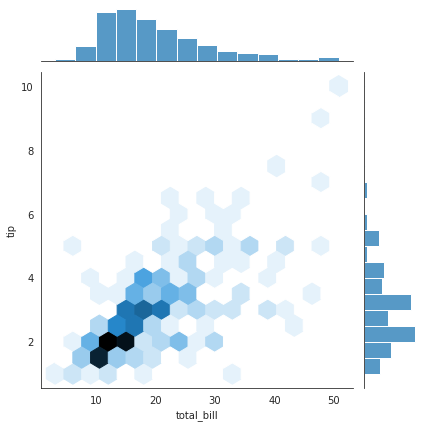

In [7]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data = tips, kind = 'hex')

C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


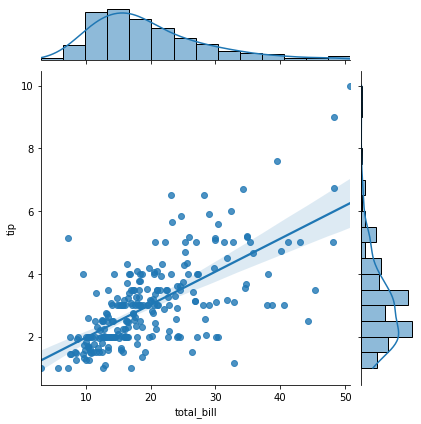

In [8]:
sns.jointplot('total_bill', 'tip', data = tips, kind = 'reg')

In [9]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


C:\Users\U\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


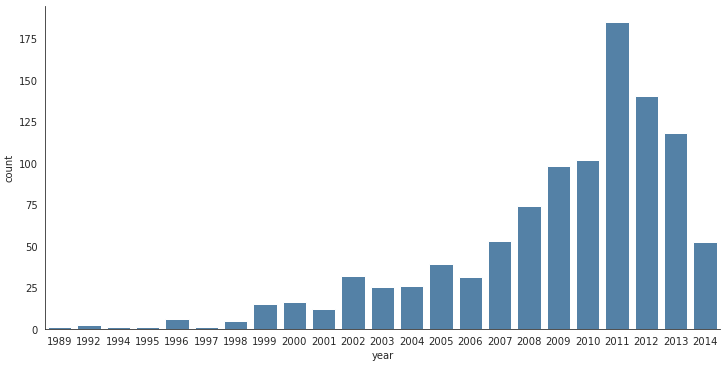

In [10]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data = planets, aspect = 2, kind = 'count', color = 'steelblue')
    #g.set_xticklabels(step = 5)

C:\Users\U\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


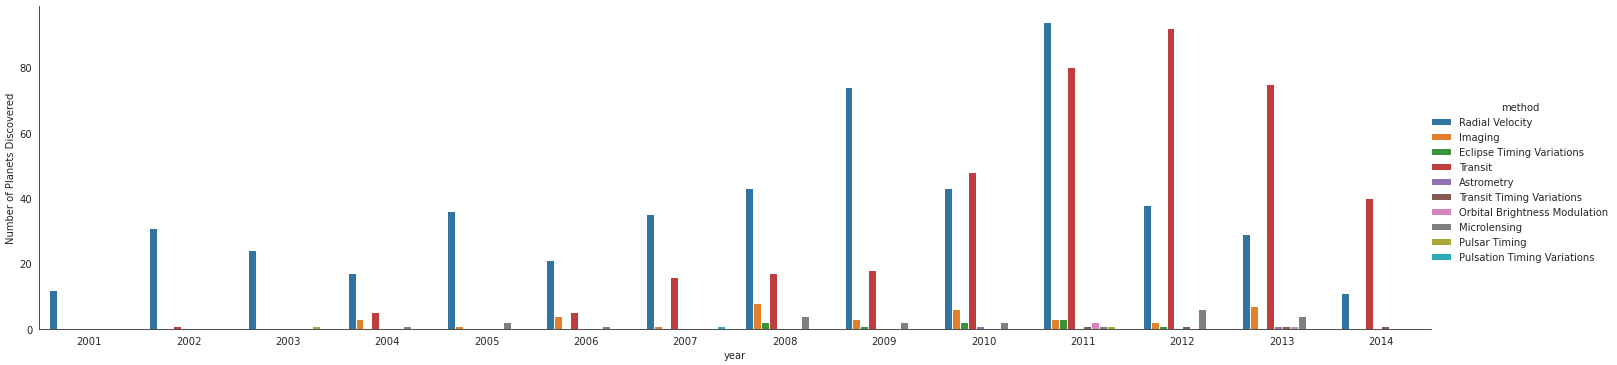

In [11]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data = planets, aspect = 4.0, kind = 'count', hue = 'method', order = range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [12]:
data = pd.read_csv('data\marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [13]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [14]:
def convert_time(value):
    #h, m, s = map(int, value.split(':'))
    #return pd.datetools.timedelta(hours = h, minutes = m, seconds = s)
    return pd.to_timedelta(value)

In [15]:
data = pd.read_csv('data/marathon-data.csv', converters = {'split': convert_time, 'final': convert_time})

data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [16]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [17]:
data['split_sec'] = data['split'].astype('timedelta64[s]')
data['final_sec'] = data['final'].astype('timedelta64[s]')

data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


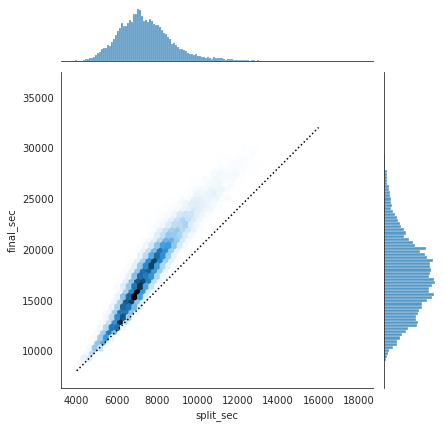

In [18]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind = 'hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [19]:
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']

data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


C:\Users\U\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


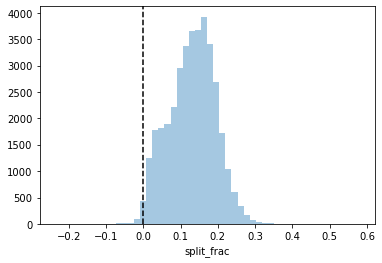

In [20]:
sns.distplot(data['split_frac'], kde = False)
plt.axvline(0, color = 'k', linestyle = '--');

In [21]:
sum(data['split_frac'] < 0)

251

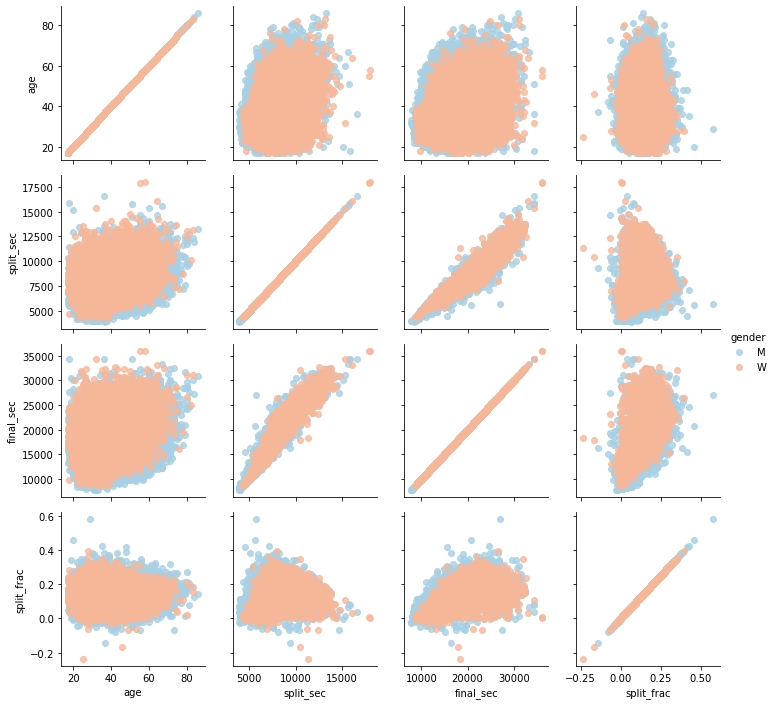

In [22]:
g = sns.PairGrid(data, vars = ['age', 'split_sec', 'final_sec', 'split_frac'], hue = 'gender', palette = 'RdBu_r')
g.map(plt.scatter, alpha = 0.8)
g.add_legend();

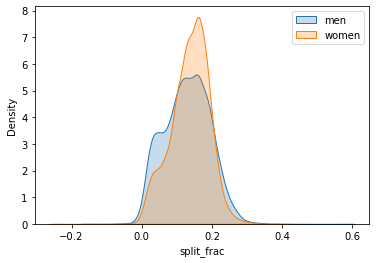

In [27]:
sns.kdeplot(data['split_frac'][data['gender'] == 'M'], label = 'men', shade = True)
sns.kdeplot(data['split_frac'][data['gender'] == 'W'], label = 'women', shade = True)

plt.legend()
plt.xlabel('split_frac');

C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


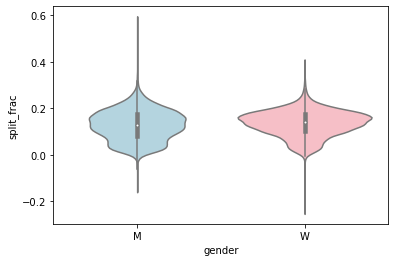

In [29]:
sns.violinplot('gender', 'split_frac', data = data, palette = ['lightblue', 'lightpink']);

In [30]:
data['age_dec'] = data['age'].map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


In [31]:
data.tail()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
37245,18,M,0 days 04:24:24,0 days 09:32:57,15864.0,34377.0,0.077057,10
37246,36,M,0 days 04:35:43,0 days 09:33:28,16543.0,34408.0,0.038421,30
37247,51,M,0 days 04:22:35,0 days 09:33:40,15755.0,34420.0,0.084544,50
37248,55,W,0 days 04:58:06,0 days 10:00:40,17886.0,36040.0,0.007436,50
37249,58,W,0 days 04:59:49,0 days 10:01:08,17989.0,36068.0,0.002495,50


C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


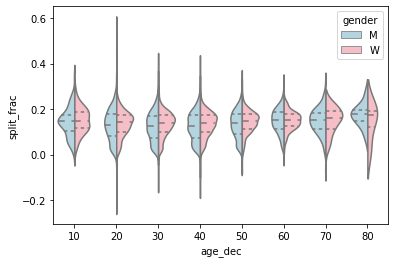

In [32]:
men = (data['gender'] == 'M')
women = (data['gender'] == 'W')

with sns.axes_style(style = None):
    sns.violinplot('age_dec', 'split_frac', hue = 'gender', data = data, split = True, inner = 'quartile', 
                   palette = ['lightblue', 'lightpink']);

In [33]:
(data['age'] > 79).sum()

15

C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


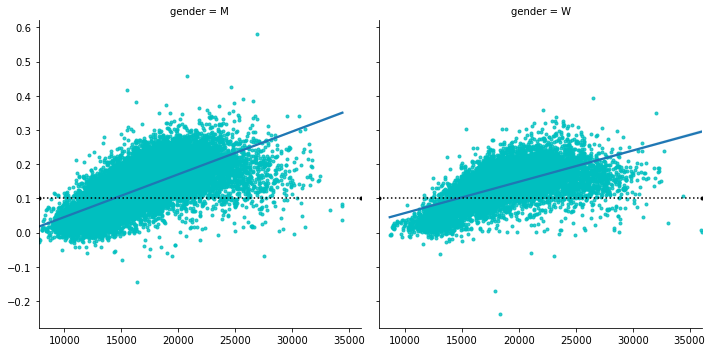

In [35]:
g = sns.lmplot('final_sec', 'split_frac', col = 'gender', data = data, markers = '.', scatter_kws = dict(color = 'c'))
g.map(plt.axhline, y = 0.1, color = 'k', ls = ':');

C:\Users\U\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


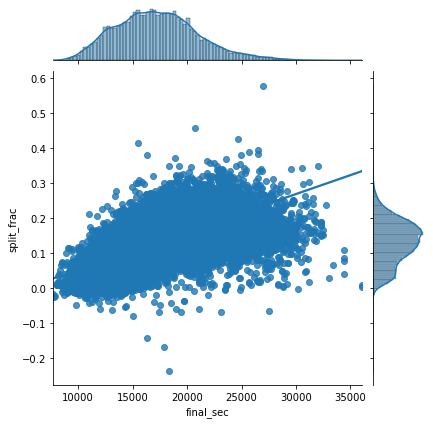

In [36]:
sns.jointplot("final_sec", "split_frac", data = data, kind='reg');